# Accuracy of Taylor series approximation with Gaussian input

In deriving the equations (see maths working), we have:

$$\int_{-\infty}^\infty x_n(t + \Delta t) A_\pm e^\frac{-|\Delta t|}{\tau_S} \text{ d}\Delta t \\\approx \kappa_S x_n(t) + \kappa_A \dot x_n(t)$$

Where:

$$\begin{align*}
	\kappa_S &= \int_{-\infty}^0 A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t \\
	\kappa_A &= \int_{-\infty}^0 \Delta t A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty \Delta t A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t
\end{align*}$$

Basically, we assume $x$ is linear over the timescale of integration of the STDP kernel.

Therefore, the weight distribution is given by:

$$\begin{align*}
	w_{mn} &= \frac{1}{\gamma r_n} \int_0^T x_m(t) \int_{-\infty}^\infty x_n(t + \Delta t) A_\pm e^\frac{-|\Delta t|}{\tau_S} \text{ d}\Delta t \text{ d} t\\
	&\approx \frac{\kappa_S}{\gamma r_n} \langle x_m, x_n \rangle + \frac{\kappa_A}{\gamma r_n} \langle x_m, \dot x_n \rangle
\end{align*}$$

In this case we use a completely asymmetric kernel, so $\kappa_S = 0$ and so $w_{mn}$ is approximately proportional to $\langle x_m, \dot x_n \rangle$

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('figure', figsize=(12.0, 8.0))

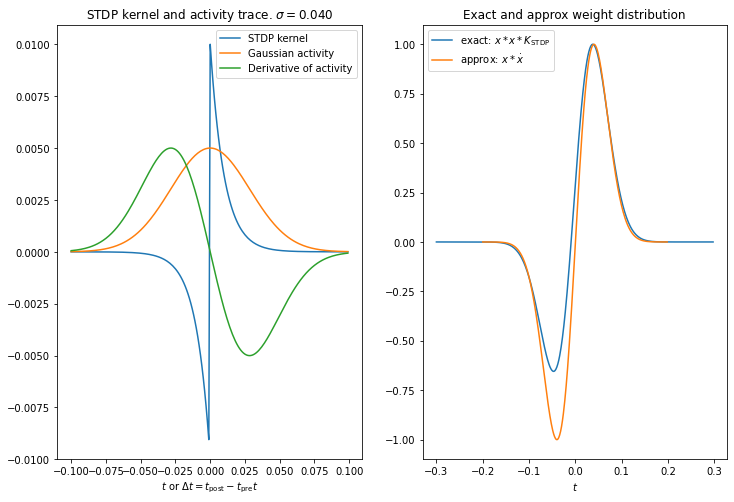

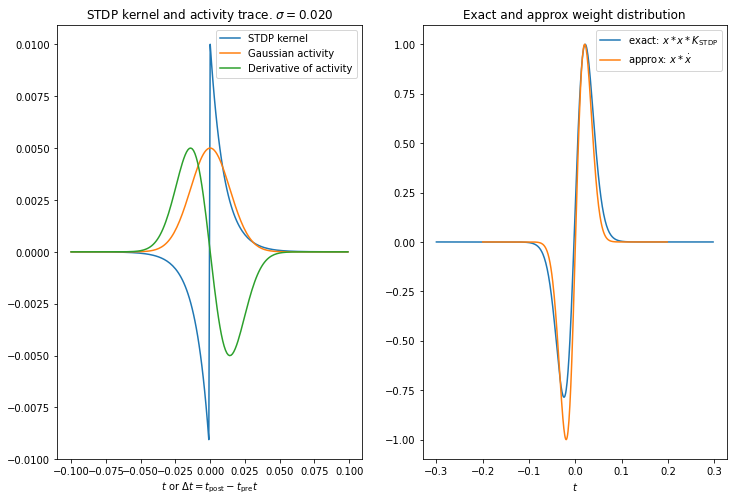

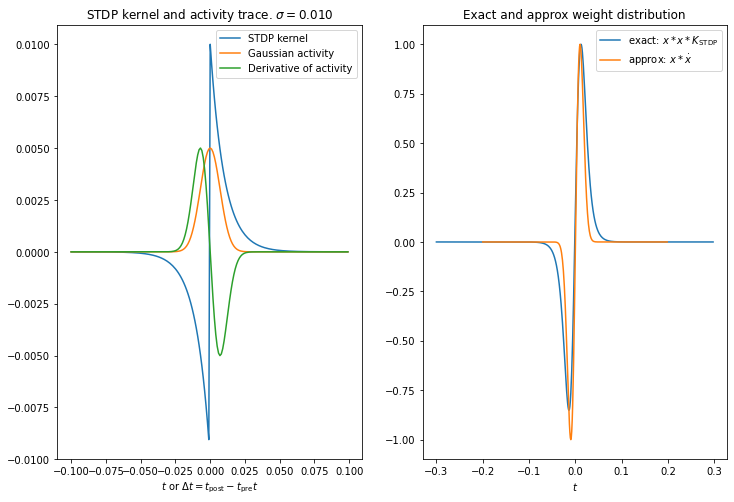

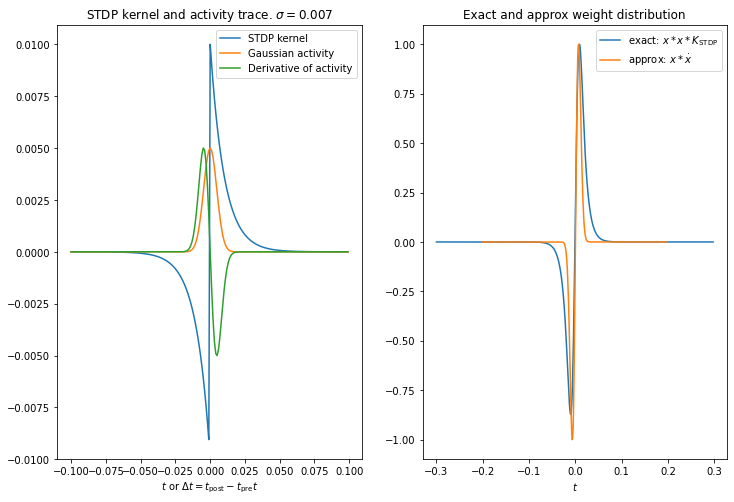

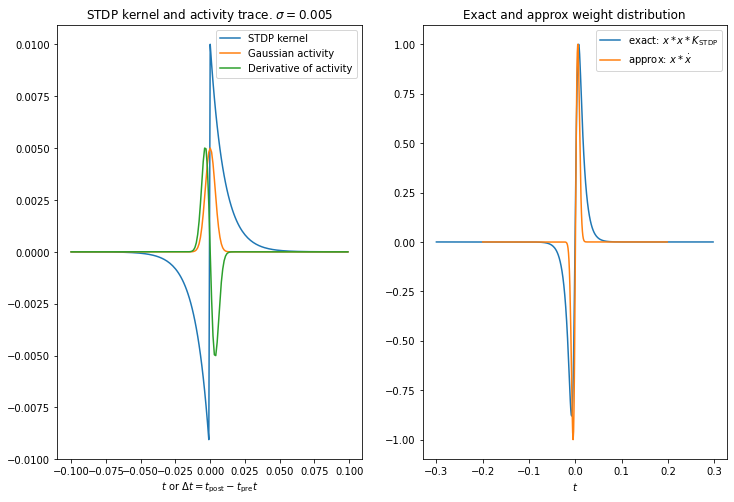

In [21]:
A_plus = 1e-2
A_minus = -1e-2
tau_stdp = 10e-3
num_neurons = 200

# simulation parameters
num_neurons = 200
bump_speed = 1 # neurons / ms
period = num_neurons // bump_speed # ms

stdp_kernel = lambda delta_t: (A_plus * (delta_t >= 0) + A_minus * (delta_t < 0)) * np.exp(-abs(delta_t) / tau_stdp)
gaussian = lambda t,sigma: 1/(sigma*np.sqrt(2*np.pi)) * np.exp(- (t/sigma)**2)
gaussian_derivative = lambda t,sigma: 1/(sigma*np.sqrt(2*np.pi)) * -2*t/sigma**2 * np.exp(- (t/sigma)**2)

scale = lambda x: x / x.max()

delta_t = np.arange(-0.1,0.1,0.001)

for sigma in [period/1000/n for n in [5,10,20,30,40]]:
	g = gaussian(delta_t,sigma)
	g_dot = gaussian_derivative(delta_t,sigma)

	fig, axs = plt.subplots(1,2)
	axs[0].plot(delta_t, stdp_kernel(delta_t), label='STDP kernel')
	axs[0].plot(delta_t,A_plus/2*scale(g), label='Gaussian activity')
	axs[0].plot(delta_t,A_plus/2*scale(g_dot), label='Derivative of activity')
	axs[0].set_xlabel(r'$t$ or $\Delta t = t_{\rm{post}} - t_{\rm{pre}}t$')
	axs[0].set_title(f'STDP kernel and activity trace. $\sigma = {sigma:.3f}$')
	axs[0].legend()


	axs[1].plot(np.arange(3*delta_t.min(),3*delta_t.max(),0.001),scale(np.convolve(np.convolve(stdp_kernel(delta_t), g), g)), label=r'exact: $x * x * K_{\rm{STDP}}$')
	axs[1].plot(np.arange(2*delta_t.min(),2*delta_t.max(),0.001), -scale(np.convolve(g,g_dot)), label=r'approx: $x * \dot{x}$')
	axs[1].set_xlabel(r'$t$')
	axs[1].set_title('Exact and approx weight distribution')
	axs[1].legend()
	plt.show()

For large values of the Gaussian standard deviation (population size / 5) the activity trace varies slowly over the timescale of the STDP kernel, so the Taylor series approximation is close and the approximate weight distribution matches the exact.

For small values of the Gaussian standard deviation (population size / 40) the activity trace varies quickly over the timescale of the STDP kernel, so the Taylor series approximation is not so close. In this case the exact weight distribution tends to looks like the STDP kernel (because it is convolved with a narrow Gaussian, which acts somewhat like a dirac delta).